

# No show appointment project:  
## Investigating the characteristics of patients who failed to show up for their medical appointments  appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report investigates the dataset collected from 100k medical appointments in Brazil in order to explore which factors have affected the rate of 'no show-up' for their scheduled medical appointment. As part of the Introduction, the relevant dataset will be imported along with necessary packages. This will be followed by data wrangling process, where the dataset is explored and cleaned in preparation to the exploratory data analysis. Finally, findings will be presented and the initial research question will be answered.

In [1]:
# Import all of the packages that will help explore data (Note: a Magic word, % not used as working in Python) 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Bring the dataset saved as 'noshowappointments.csv'

df = pd.read_csv('noshowappointments.csv')

<a id='wrangling'></a>
## Data Wrangling

> Based on the provided dataset, this section will explore the dataset, checking for cleanliness. 

### General Properties

In [2]:
# Explore the dataset 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Above steps show that there are 14 columns with 110,527 samples. 14 columns include variables such as a patient identification number (PatientId), identification number of each appointment (AppointmentID), Gender, the day when the patient set up their appointment (ScheduledDay), the actual appointment day (AppointmentDay), Age, and the location of the appointment (Neighbourhood), and whether they are enrolled in Brazilian welfare programme (Scholarship: 0 for no, and 1 for yes), or have condition of Hipertension, Diabetes, Alcoholism, Handcap, a number of notification received (SMS_received), and whether they turn up to the appoint or not (No_show: No for show up, and Yes for no show up). The above result shows that there seemed to be no missing values.

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
sum(df.PatientId.duplicated())

48228

In [7]:
df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

> From the result above, it seems that one patient might have made more than one appointment. Out of total 110,527 appointments made, PatientID entry is only 62,299 (42,228 patients have made multiple appointments).
Moreover, all appointments have happened on 27 different days in total over the period of 29th April 2016 and 8th June 2016. In order to see if there is any relationship between the duration of time people have waited for their appointment since they scheduled an appointment and their actual attendance at the appointment, it would be good to create another column that shows the difference between ScheduledDay and AppointmentDay. 

In [8]:
print(type(df['ScheduledDay'][0]), type(df['AppointmentDay'][0]))

<class 'str'> <class 'str'>


> Both data are saved as strings. In order to compare the difference, I first transformed the data type to datetime, then created a list (called, ‘newcolumn’) that contains the difference between two values. In order to make the comparison easy, I decided to include the data only until ‘day’.  

In [9]:
from datetime import datetime
new_ScheduledDay = (df['ScheduledDay'])
new_AppointmentDay = (df['AppointmentDay'])
newcolumn = list()
for i in list(range(new_ScheduledDay.size)):
    new_ScheduledDay_object = datetime.strptime(new_ScheduledDay[i][0:10], '%Y-%m-%d')
    new_AppointmentDay_object = datetime.strptime(new_AppointmentDay[i][0:10], '%Y-%m-%d')
    difference = new_AppointmentDay_object - new_ScheduledDay_object
    newcolumn.append(difference.days)

# check the total length of the column to see if the function worked correctly     
print(len(newcolumn))

110527


> Now this new column has to be added to the existing data frame, and check the last rows to see if it has been added correctly (first rows more likely have a small number hence it would be difficult to see if it worked right or not)  

In [10]:
new_df = df

new_df['difference'] = pd.Series(newcolumn)

new_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,41
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [11]:
# Check if the difference is calculated correctly and stored as int. 
df.difference.dtype

dtype('int64')

> Now we know that the new column is successfully added, the descriptive analysis is performed to see if there is any odd data, and the data cleaning process will be followed. 

### Data Cleaning

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,difference
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


> Two odd numbers are instantly found: minimum age is -1, and there is a minus figure in ‘difference’ (i.e. appointment happened earlier than the scheduled day). The following steps are conducted in order to investigate these odd data further. 

In [13]:
df.loc[df['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No,0


> There is one entry for this data. This might be recorded wrongly, and we have two choices: either drop this entry, or modify the age with ‘0’ or ‘1’. However, if we decide to modify the value, it may cause further errors later and as it’s only one entry, I decided to drop this entry. 

In [14]:
df1 = df.drop(df.index[99832])

In [15]:
# Check if the function worked well 
df1.Age.min()

0

> The result now shows now the minimum value of age is 0. The next setp investigates the minus value of difference based on df1. 

In [16]:
df1.loc[df['difference'] == -6]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6


> There is only one entry that has -6 days of difference. This might be an error, hence we drop this row

In [17]:
df2 = df1.drop(df1.index[71533])

In [18]:
# Check if it worked 
df2.difference.min()

-1

> It show that there are more entries with minus differences. Hence we check the relevant data

In [19]:
df2.loc[df2['difference'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


> The finding shows that extra 4 appointments were recorded earlier than the scheduled day. This might have been an error. Hence we drop these entries too. 

In [20]:
# Now drop the rows with -1 difference 
df3 = df2[df2.difference != -1]

In [21]:
# Check if it worked 
df3.difference.min()

0

> To see if there is any other odd data, 'max' value will be checked. For example, the maximum value of Handcap is 4. 

In [22]:
df3.loc[df3['Handcap']== 4]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference
91820,9.251878e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,DA PENHA,0,0,0,0,4,0,No,0
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,No,2
104268,7.581895e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,ITARARÉ,0,0,0,0,4,1,Yes,20


> 3 entries show the value of 4 for Handcap. It would be better also to check if there are other entries that have the value other than 0 or 1. 

In [23]:
df3.loc[df3['Handcap'] > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No,15
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No,30
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No,30
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No,0
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No,0
2213,3.423831e+09,5640766,F,2016-04-29T11:22:50Z,2016-04-29T00:00:00Z,29,VILA RUBIM,0,0,0,0,2,0,No,0
2214,2.754718e+12,5640760,M,2016-04-29T11:22:20Z,2016-04-29T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,No,0
2673,4.415275e+13,5589893,M,2016-04-15T13:06:05Z,2016-04-29T00:00:00Z,17,SANTA TEREZA,0,0,0,0,2,1,No,14
5424,1.647280e+12,5647342,M,2016-05-02T13:24:36Z,2016-05-04T00:00:00Z,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes,2
5467,4.555225e+12,5689883,F,2016-05-12T09:10:28Z,2016-05-16T00:00:00Z,10,BENTO FERREIRA,0,0,0,0,2,0,No,4


> According to the data description originally provided by Kaggle, Handcap should be marked as True or False, not based on the range of Handcap. Moreover, as a large number of entries contain the value other than 0 or 1, I decided to drop this column and not include in my analysis. 

In [24]:
df4 = df3.drop('Handcap', axis =1)
df4.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,difference
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No,0


Next, we will see if Neighourhood can be a meaningful variable that can be linked to 'show-up' data.

In [25]:
df4.Neighbourhood.nunique()

81

> 81 is a large number, and it might be difficult to analyse data based on the location of appointments, hence I will drop this column as well

In [26]:
df5 = df4.drop('Neighbourhood', axis = 1)
df5.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,difference
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,No,0


> To see if the data looks clean enough, we will do the descriptive analysis again. 

In [27]:
df5.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,difference
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.321043,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.466879,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


> Although it overall looks fine, just in case we will check the maximum value of Age and difference again to see if there is any abnormality.

In [28]:
df5.query('Age == 115')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,difference
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,0,0,0,0,0,Yes,3
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,0,0,0,0,0,Yes,3
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,0,0,0,0,0,Yes,38
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,0,0,0,0,0,No,0
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,0,1,0,0,1,No,15


> This is actually interesting. There are 5 entries with the Age 115. However, the first 4 entries are all made from the same patient. It seems that this patient has failed to attend 3 appointments, but attended the last one. Moreover, it seems that the first two entries are duplicated although 'AppointmentID' is different. Therefore, we can delete this duplicated data, and will explore this interesting fact later in the analysis part. 

In [29]:
# Drop the duplicated data found earlier 
df6 = df5.drop(df.index[63915])

In [30]:
# Check if the data is dropped properly 
df6.loc[df['Age'] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,difference
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,0,0,0,0,0,Yes,3
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,0,0,0,0,0,Yes,38
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,0,0,0,0,0,No,0
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,0,1,0,0,1,No,15


> Next we will investigate the maximum value of 'difference' (179 days). 

In [31]:
df6.loc[df['difference']== 179]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,difference
102786,4.542871e+11,5134227,M,2015-12-07T10:43:34Z,2016-06-03T00:00:00Z,67,0,1,1,0,0,No,179
102788,2.547555e+14,5134249,F,2015-12-07T10:45:01Z,2016-06-03T00:00:00Z,63,0,1,1,0,1,No,179
102789,3.112342e+13,5134239,F,2015-12-07T10:44:25Z,2016-06-03T00:00:00Z,60,0,1,1,0,1,No,179
102790,9.965348e+14,5134243,M,2015-12-07T10:44:40Z,2016-06-03T00:00:00Z,73,0,1,1,0,0,No,179
102791,9.416259e+14,5134228,F,2015-12-07T10:43:50Z,2016-06-03T00:00:00Z,77,0,1,1,0,1,No,179
102792,3.512659e+14,5134233,M,2015-12-07T10:44:07Z,2016-06-03T00:00:00Z,73,0,1,1,0,0,Yes,179
102795,1.216587e+12,5134197,F,2015-12-07T10:40:59Z,2016-06-03T00:00:00Z,27,1,0,0,0,1,Yes,179
102796,9.582232e+12,5134223,F,2015-12-07T10:43:01Z,2016-06-03T00:00:00Z,80,0,1,1,0,1,No,179
102797,3.189960e+13,5134220,F,2015-12-07T10:42:42Z,2016-06-03T00:00:00Z,48,0,1,1,0,1,No,179
102799,3.516254e+12,5134224,F,2015-12-07T10:43:17Z,2016-06-03T00:00:00Z,74,0,1,1,0,1,No,179


> It seems that the longest waiting time was created by 10 patients who scheduled the appointment on the same day - 7th Dec 2015 for an anppointment on the same day again - 3rd June 2016. So far none of those data seem abnormal, hence we leave it as it is. 

> To keep it tidy, let's change the column names to low case and No-show to no_show

In [32]:
# change column names to lowe case 
df6.columns = map(str.lower, df6.columns)

In [34]:
# change no-show to no_show
df6.rename(columns={'no-show': 'no_show'}, inplace=True)

In [35]:
# check if it works 
df6.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show,difference
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,No,0


> Now the data is cleaned for the Exploratory Data Analysis. This new dataset will be saved as a new file. 

In [36]:
df6.to_csv('clean_noappointment.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> Based on the cleaned data, this section explores the following factors in association with the rate of ‘no show-up’: age, difference, SMS-received, and any condition that a patient has. 

> first of all, the cleaned data is called for further analysis. 

In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
df = pd.read_csv('clean_noappointment.csv')
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show,difference
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,No,0


### Descriptive data analysis 

In [38]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,sms_received,difference
count,1.105200e+05,1.105200e+05,110520.000000,110520.000000,110520.000000,110520.000000,110520.000000,110520.000000,110520.000000
mean,1.474917e+14,5.675304e+06,37.088681,0.098272,0.197258,0.071869,0.030402,0.321046,10.184410
std,2.560869e+14,7.129719e+04,23.108801,0.297683,0.397931,0.258273,0.171691,0.466881,15.255207
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439068e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


### Research Question 1. Impact of Gender on no-show up 

In [40]:
df.gender.value_counts()

F    71835
M    38685
Name: gender, dtype: int64

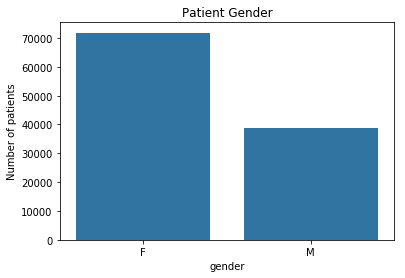

In [50]:
# I'd like to my bar bit fatter than this, but not sure how to do so.
# Any advice would be greatly appreciated! 
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'gender', color = base_color);
plt.title('Patient Gender')
plt.ylabel('Number of patients');

> There are more female patients than male patients who made appointments. However, as we already know that some patients made more than one appointment, we cannot assume that there were more female patients, but the data shows that more female patients made appointments than male patients. The following steps compare if there was any show-up rate difference dependent on gender of patients. 

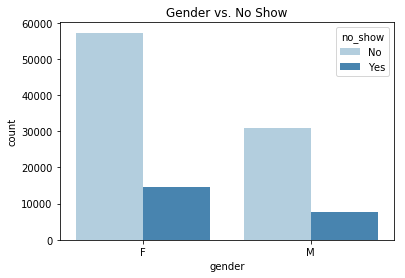

In [51]:
sb.countplot(data = df, x = 'gender', hue = 'no_show', palette = 'Blues')
plt.title('Gender vs. No Show');

> The bar chart above shows that female patients had a higher rate of not turning up at the appointment than male patients. However, it might be because the dataset had a higher number of female patients than male. Hence, it would be better to check other factors. 

### Research question 2. Impact of Age on no show-up 

In [52]:
df.age.describe()

count    110520.000000
mean         37.088681
std          23.108801
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

> The average age is 37 years old, and this value is same as the median value. 2/3 of the dataset belongs to the age range between 15 to 55, and the mid 50% belongs to the age group between 18 and 55. Hence, from the descriptive analysis, it almost seems that it's normal distributed. We will check if it is true by creating a histogram. 

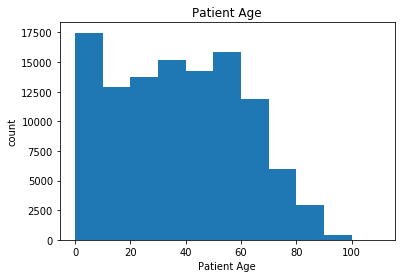

In [53]:
bins = np.arange(0, 115+1, 10)
plt.hist(data = df, x = 'age', bins = bins);
plt.xlabel('Patient Age')
plt.ylabel('Number of patients');
plt.title('Patient Age');

> However, the histogram shows that there is a large number of younger children aged below 15, with a relative low proportion of very elderly population, which might have pushed the average down. 
The next graph explore the relationship between age and no-show. 

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

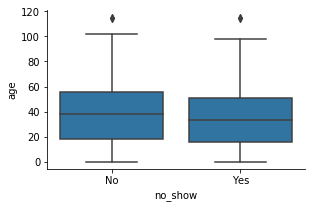

In [54]:
samples = np.random.choice(df.shape[0], 2000, replace = False)
age_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['age'], x_vars = ['no_show'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

> The boxplot above shows that overall people who did not turn up at the appointment are slightly younger than people who turned up at the appointment. Let's investigate the distribution of the age more closely 

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

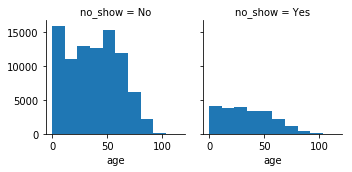

In [60]:
g = sb.FacetGrid(data = df, col = 'no_show', size = 4)
g.map(sb.boxplot, 'user_type', 'log_duration')

> Above histograms show that the distribution of age for people who turned up at the appointment (i.e. no_show = No) has two modal points - age below 15 and around 50-55. However, the no-show group overall has a high number of no-show ratings across 0 to 60, which perhaps pushed the overall median lower than the show group. 

### Research Question 3. Impact of waiting time (difference) on no-show up

In [61]:
df.difference.describe()

count    110520.000000
mean         10.184410
std          15.255207
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: difference, dtype: float64

> From this data, it shows that on average people wait 10 days until their appointment, with standard deviation of 15 days. The following step explores the relationship between the waiting time and no show-up rate. 

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


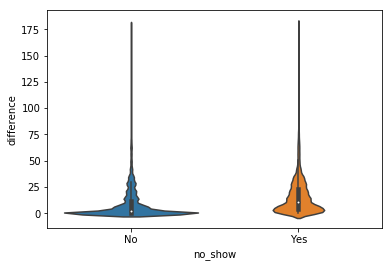

In [64]:
sb.violinplot(data = df, x = 'no_show', y = 'difference'); 
# the graph shows that there are high outliers. let's look at the lower range more closely 

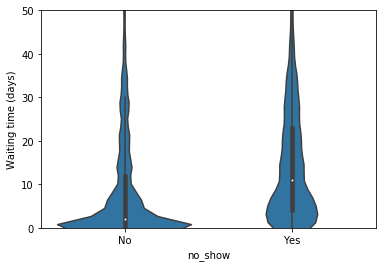

In [67]:
sb.violinplot(data = df, x = 'no_show', y = 'difference', color = base_color); 
plt.ylim([0, 50]);
plt.ylabel('Waiting time (days)');

> The result shows that interestingly people who did not turn up at the appointment had a longer waiting time (median: 10 days) than people who turned up at the appointment. It shows that the longer people wait since they made an appointment, the more likely they would miss the appointment.  

<a id='conclusions'></a>
## Conclusions

### Findings 
> The initial dataset contains the total 110,527 patients. Through the data wrangling process, we learnt that some patients made more than one appointment and some entries contain errors or were duplicated. After cleaning the data, total 110,520 entries were saved and used for the analysis. The exploratory data analysis shows that more female patients have made appointments and also missed their appointments more than male patients. It also shows that among patients who made an appointment at the hospital, a relatively high proportion of them was younger ones (10.6% aged 5 or under) although the average patient age was 37 years old. Moreover, the exploratory analysis shows that young (below 15) and middle age (50-60) patients had the highest records of show-up, while nearly the equal number of patients across the age group below 60 failed to turn up. Finally, the time difference between the scheduled day and appointment day has been calculated and added to the existing dataset, and the finding shows that the appointment was more likely missed if there is a long waiting time until their appointment.  

### Limitations and further work 

> The exploratory data analysis does not include the analysis of the impact of a patient condition on no-show. Ideally it would be great to create an extra column that contains whether they have any special condition or not (e.g. titled ‘condition’ and if any of ‘Scholarship’, ‘Hipertension’, ‘Diabetes’, or ‘Alcoholism’ has the value of 1 (True), it generates the value of 1, and this can be compared with ‘No-show’ later). If the analysis shows that a patient with a condition has missed the appointment more than a patient without any condition, a further analysis can be conducted to see what types of conditions are causing ‘no show’. 
Moreover, we already found out that some patients made more than one appointment, and the data from the patient aged 115, some patients made appointments and missed few before making to the final appointment. Therefore, it would be also useful to analyse on average how many appointments patients miss until they finally turn up to the appointment, which will include the steps of first identifying patients who made more than one appointment, then arrange the dataset based on the patient ID and identify how many appointments they have made and on average how many appointments they have missed until they showed up, and arrange the dataset based on those days. 
As mentioned earlier in the exploratory data analysis part, identifying the cause of all missing appointments by infants can also bring some important insights into the findings, as well as the detailed investigation on the high missing rate of the same day appointment. 

### Challenges 

> The major challenge (and main reason of delayed completion) came from my lack of knowledge in python. It took a long time to simply clean the data. I am used to use Excel or SPSS-type software to analyse the data, and dealing with Python has required a completely new angle to problem solving. There were many more things I would like to do, but I could not do, and as I realised that I could easily spend another month with this, I decided to submit the project as it currently stands. 